# The Sparks Foundation

# Task 1- Prediction using Supervised ML

Predict the percentage of an student based on the no.of study hours.

Simple Linear Regression

What will be predicted score if a student studies for 9.25 hrs/day?

In [12]:
# Importing all the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
# Reading the dataset
df = pd.read_csv('http://bit.ly/w-data')

In [14]:
# The first five values in dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
# Number of Rows & Columns
df.shape

(25, 2)

In [16]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
# Check if there any null value in the Dataset
df.isnull == True

False

#### There is no null value in the Dataset so, we can now visualize our Data.

# Data Visualization


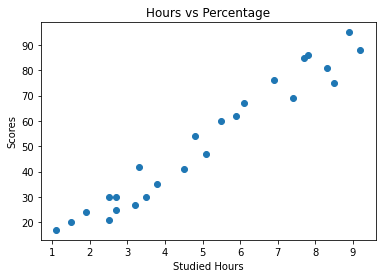

In [18]:
# Visualizing Hours VS Percentage of Scores
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

###  From the above scatter plot there looks to be correlation between the 'Studied Hours' and 'Marks Percentage', Lets plot a regression line to confirm the correlation.

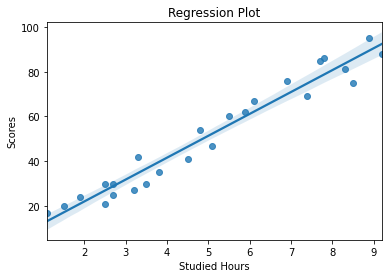

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()
print(df.corr())

### It is confirmed that the variables are positively correlated.

# Training the Model

## 1) Splitting the Data

In [20]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [21]:
# Spliting the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

## 2) Training the Simple Linear Regression model on the Training set

In [22]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("------Model Trained------")

------Model Trained------


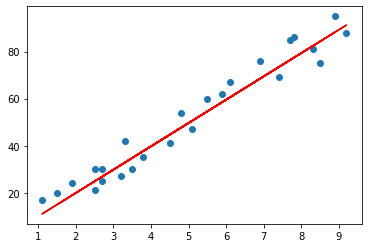

In [24]:
# PLotting the regression line
line = regression.coef_*X+regression.intercept_

# PLotting test dataset
plt.scatter (X,y)
plt.plot(X, line, color = 'red');
plt.show()

In [31]:
# Predicting the Test set results
y_pred = regression.predict(X_test)
print(y_pred)

[14.97354023 31.81174713 73.41202299 24.87836782 58.55478161 37.75464368
 18.93547126 77.37395402 68.4596092  11.0116092  50.63091954 76.38347126
 32.80222989]


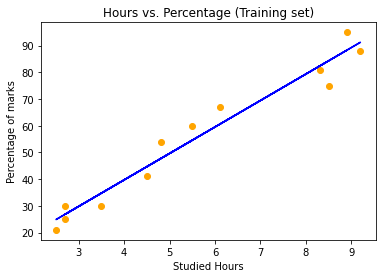

In [32]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage of marks')
plt.show()

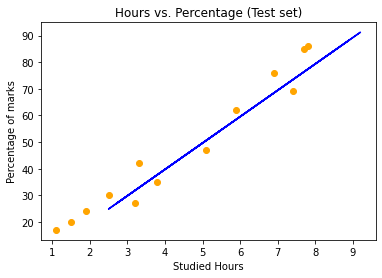

In [34]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage of marks')
plt.show()

In [36]:
# Comparing the actual values with the predicted ones.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,14.973540
1,27,31.811747
2,69,73.412023
3,30,24.878368
4,62,58.554782
5,35,37.754644
6,24,18.935471
7,86,77.373954
8,76,68.459609
9,17,11.011609


In [37]:
# Predicting the score 
df = np.array(9.25)
df = df.reshape(-1, 1)
pred = regression.predict(df)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [91.73595402].


# Error Matrics

In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 5.710484526967283


### Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the model are very less

In [44]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.936426433042132
